In [77]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
plt.rcParams["figure.dpi"] = 120

In [79]:
data_dir = "../data"

In [80]:
# AG-Pubmed, Identity Counterfactual

dfs = [
    (
        "BERT",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/bert_results_719289_cf-constant_ds-ag-pubmed.pkl"
        ),
    ),
    # (
    #     "RoBERTa",
    #     "Sports",
    #     pd.read_pickle(f"{data_dir}/full/"),
    # ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/albert_results_719285_cf-constant_ds-ag-pubmed.pkl"
        ),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/distilbert_results_719286_cf-constant_ds-ag-pubmed.pkl"
        ),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/electra_results_719288_cf-constant_ds-ag-pubmed.pkl"
        ),
    ),
]

In [81]:
# AG-Pubmed, Constant Counterfactual

dfs = [
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_719253_ds-ag-pubmed.pkl"),
    ),
    # (
    #     "RoBERTa",
    #     "Sports",
    #     pd.read_pickle(f"{data_dir}/full/"),
    # ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_719278_ds-ag-pubmed.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719275_ds-ag-pubmed.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_719265_ds-ag-pubmed.pkl"),
    ),
]

In [82]:
# MMLU, Identity Counterfactual

dfs = [
    (
        "BERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/roberta_results_719262_ds-mmlu.pkl"),
    ),
    (
        "ALBERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/albert_results_719263_ds-mmlu.pkl"),
    ),
    (
        "DistilBERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719264_ds-mmlu.pkl"),
    ),
    (
        "ELECTRA",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/electra_results_719261_ds-mmlu.pkl"),
    ),
]

In [83]:
# MMLU, Constant Counterfactual

dfs = [
    (
        "BERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719284_cf-constant_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "Computer Security",
        pd.read_pickle(
            f"{data_dir}/full/roberta_results_719282_cf-constant_ds-mmlu.pkl"
        ),
    ),
    (
        "ALBERT",
        "Computer Security",
        pd.read_pickle(
            f"{data_dir}/full/albert_results_719280_cf-constant_ds-mmlu.pkl"
        ),
    ),
    (
        "DistilBERT",
        "Computer Security",
        pd.read_pickle(
            f"{data_dir}/full/distilbert_results_719281_cf-constant_ds-mmlu.pkl"
        ),
    ),
    (
        "ELECTRA",
        "Computer Security",
        pd.read_pickle(
            f"{data_dir}/full/electra_results_719283_cf-constant_ds-mmlu.pkl"
        ),
    ),
]

In [84]:
# ScienceQA-LegalQA, Identity Counterfactual

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_719337_ds-scienceqa-legalqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/roberta_results_719340_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/albert_results_719341_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/distilbert_results_719342_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/electra_results_719339_ds-scienceqa-legalqa.pkl"
        ),
    ),
]

trained_label = "geography"

In [85]:
for _, __, df in dfs:
    df.dropna(
        subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"],
        inplace=True,
    )
    df["uncertainty_difference_relative"] = df["uncertainty_difference"] / df[
        "uncertainty_before"
    ].replace([np.inf, -np.inf], np.nan)
    df["uncertainty_ratio"] = (
        df["uncertainty_after"] / df["uncertainty_before"]
    ).replace([np.inf, -np.inf], np.nan)

In [86]:
dfs_melted = [
    (
        name,
        trained_label,
        df[["label", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["label"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        ),
    )
    for name, trained_label, df in dfs
]

In [87]:
for _, __, df_melted in dfs_melted:
    df_melted["type"] = df_melted["type"].map(
        {
            "uncertainty_before": "Before",
            "uncertainty_after": "After",
        }
    )

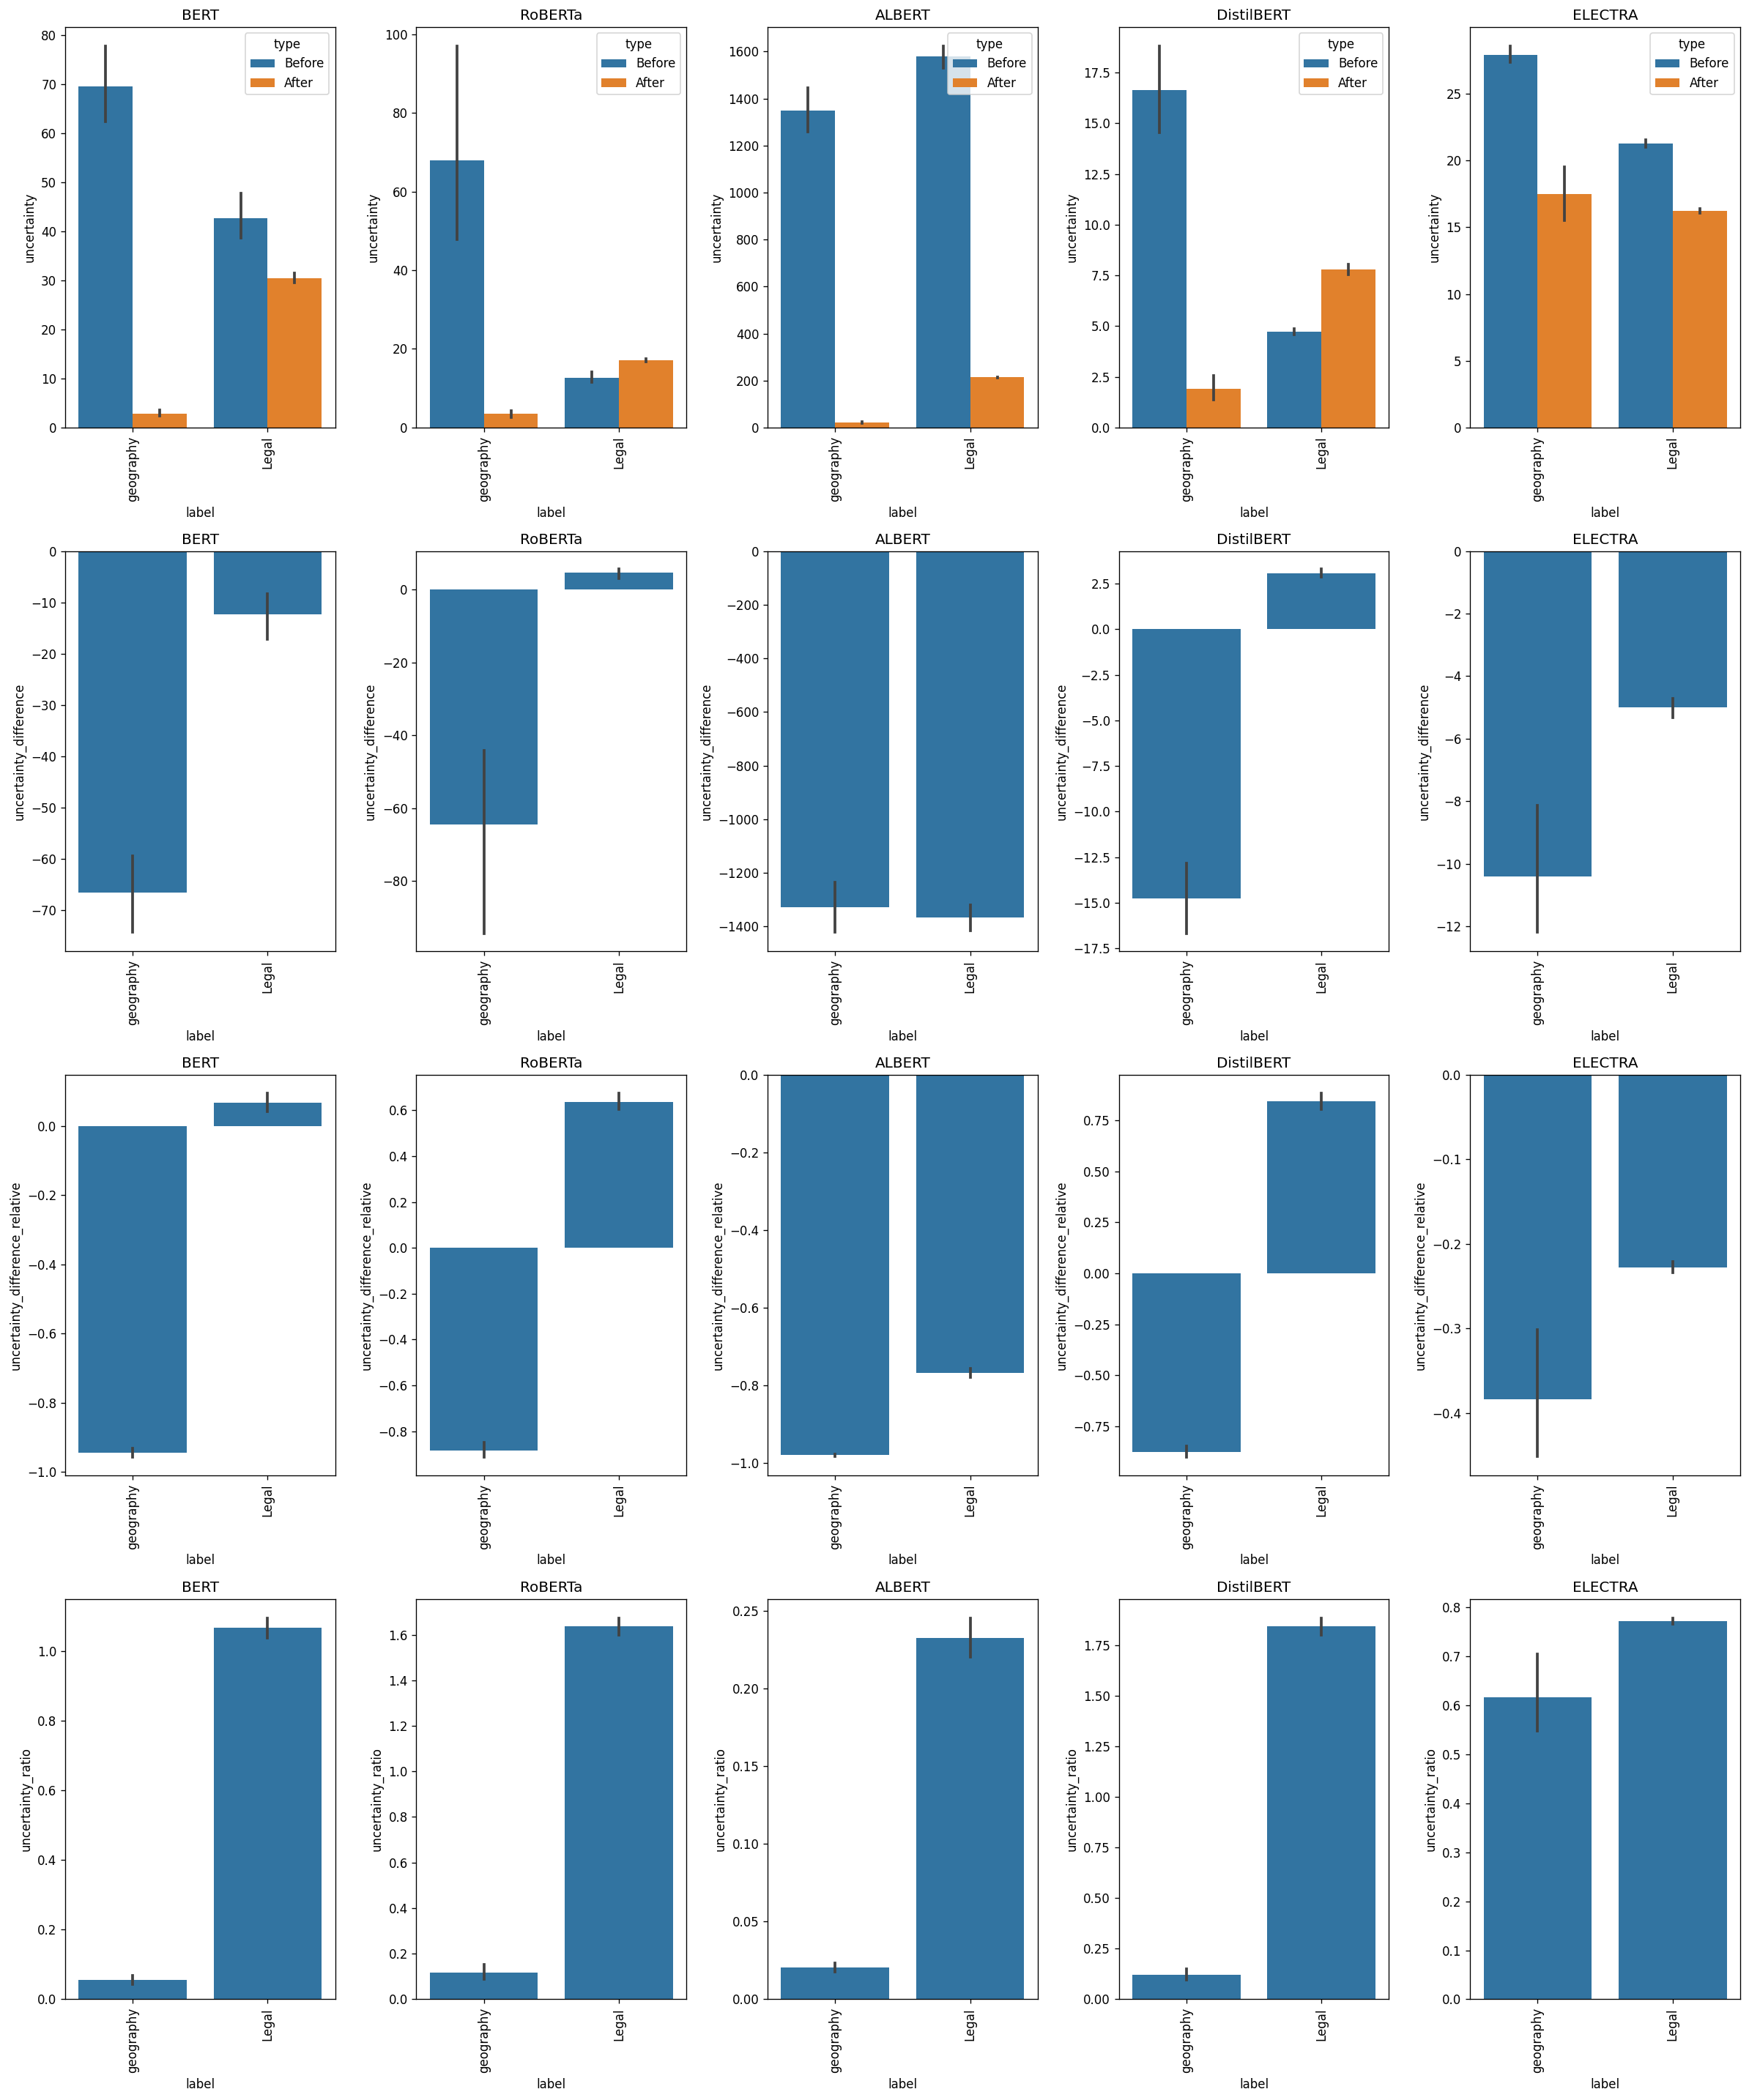

In [88]:
plt_width = 4
plt_height = 6

x_plots = len(dfs)
y_plots = 4

fig, axs = plt.subplots(
    y_plots,
    x_plots,
    figsize=(x_plots * plt_width, y_plots * plt_height),
    squeeze=False,
)

hue_colors = {
    "Before": "tab:blue",
    "After": "tab:orange",
}

for i in range(len(dfs)):
    name, trained_label, df = dfs[i]
    _, __, df_melted = dfs_melted[i]

    sns.barplot(data=df_melted, x="label", y="uncertainty", hue="type", ax=axs[0][i])
    sns.barplot(data=df, x="label", y="uncertainty_difference", ax=axs[1][i])
    sns.barplot(data=df, x="label", y="uncertainty_difference_relative", ax=axs[2][i])
    sns.barplot(data=df, x="label", y="uncertainty_ratio", ax=axs[3][i])

    for ax in axs.T[i]:
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_title(name)

plt.tight_layout()

In [89]:
for name, trained_label, df in dfs:
    trained_group = df[df["label"] == trained_label]["uncertainty_difference"]
    other_groups = df[df["label"] != trained_label]["uncertainty_difference"]

    t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

    print(
        f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
    )

BERT       geography vs Others T-statistic:     -11.9807, P-value: 0.0000
RoBERTa    geography vs Others T-statistic:      -5.3750, P-value: 0.0000
ALBERT     geography vs Others T-statistic:       0.7004, P-value: 0.4843
DistilBERT geography vs Others T-statistic:     -18.2608, P-value: 0.0000
ELECTRA    geography vs Others T-statistic:      -5.2353, P-value: 0.0000


In [90]:
for name, trained_label, df in dfs:
    trained_group = df[df["label"] == trained_label]["uncertainty_difference"]

    labels = df["label"].unique()

    for label in labels:
        if label != trained_label:
            other_group = df[df["label"] == label]["uncertainty_difference"]
            t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
            print(
                f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
            )

BERT       geography vs Legal      T-statistic:     -11.9807, P-value: 0.0000
RoBERTa    geography vs Legal      T-statistic:      -5.3750, P-value: 0.0000
ALBERT     geography vs Legal      T-statistic:       0.7004, P-value: 0.4843
DistilBERT geography vs Legal      T-statistic:     -18.2608, P-value: 0.0000
ELECTRA    geography vs Legal      T-statistic:      -5.2353, P-value: 0.0000
